# Práctica #02 - Minería de Datos -- Emmanuel Ontiveros Castillo

## Preparación de datos

    Importando librerías

In [3]:
import pandas as pd
import numpy as np
import pandas_profiling as pdprof
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

    Aquí leeré la base de datos.

In [4]:
df = pd.read_csv("C:\\Users\\Kradn\\OneDrive\\Escritorio\\Mineria de Datos\\Practica2\\winemag-data_first150k.csv")

    Aquí citaré las columnas de la base de datos. Esto lo hice para darme una idea principal del conjunto de datos con el que estoy tratando.

In [5]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

    Aqui mostré un poco de la base de datos para confirmar los nombres de las columnas y entrar un poco más en contexto con los datos que voy a estar manejando.

In [6]:
df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


    Después, usé esta función para ver el tipo de variable con el que contaban las columnas y saber con cuales puedo trabajar para hacer gráficas. Al leer la información, me percaté que si voy a querer mostrarle a por ejemplo, un cliente cual es el resultado de la información recabada mediante imágenes, sería bueno tener en cuenta el promedio de calificacion y precio del producto. Así que quice ver si las columnas no tenian diferentes datos.

In [7]:
df.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

    Verifiqué que no hubiera campos nulos

In [11]:
df.isnull().any()

Unnamed: 0     False
country         True
description    False
designation     True
points         False
price           True
province        True
region_1        True
region_2        True
variety        False
winery         False
dtype: bool

    Aquí saqué el promedio de la columna "Price". Porque si por ejemplo, fueramos contratados para hacer un analisis de esta información, sería importante hacer una comparativa de las estadísticas de popularidad de su producto. Para esto es importante saberel promedio general del precio y la calificación del producto. También ver cual es la popularidad entre las provincias.

In [12]:
df['price'].mean()

33.13148249353299

    Aquí saqué el promedio de la columna "Points" Este paso lo hice para poder darme una idea de como saldría el resultado con respecto a correlacion y covarianza, que hice en los siguientes pasos.

In [13]:
df['points'].mean()

87.8884184721394

    Después generé una correspondencia o relación recíproca entre entre las columnas "Price" y "Points"

In [14]:
df.corr()

,Unnamed: 0,points,price
Unnamed: 0,1.000000,-0.094197,-0.036687
points,-0.094197,1.000000,0.459863
price,-0.036687,0.459863,1.000000


    Y para esta linea generé una covarianza con las mismas columnas. Nos permite saber cómo se comporta una variable en función de lo que hace otra variable.

In [15]:
df.cov()

,Unnamed: 0,points,price
Unnamed: 0,1.898335e+09,-13225.241176,-58456.549452
points,-1.322524e+04,10.383809,53.813033
price,-5.845655e+04,53.813033,1319.326636


    Esta gráfica solamente la generé porque me pareció interesante como se solapaban los nombres de las provincias por el espacio. (Queria vers i se podía extender para verlos todos, pero por la cantidad de datos no se podría)

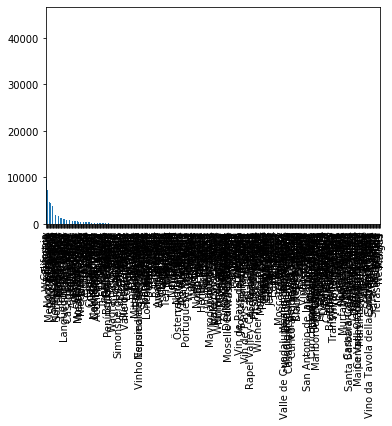

In [17]:
df['province'].value_counts().plot.bar()

## Gráficas

    Aquí generé una gráfica de área para poder mostrar el desarrollo de los valores cuantitativos (que verifiqué en pasos anteriores.

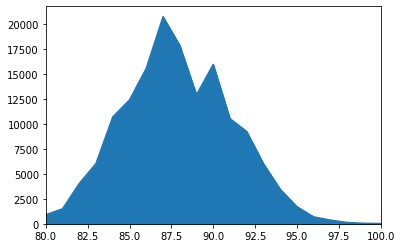

In [18]:
df['points'].value_counts().sort_index().plot.area()

    Podemos ver que mientras más caro sea el vino, podrá llegar a tener una mayor calificación, lo que me resulta curioso es que el pico más alto no se encuentra en la calificación más alta, esto puede referirse al precio por el cual es vendido o distribuido en diferentes lugares

    Aqui generé una gráfica de box plot, que se usa para resaltar aspectos de distribución de los datos metiante cuartiles.

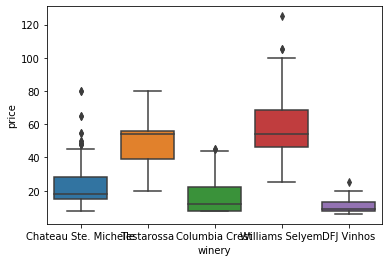

In [20]:
df = df[df.winery.isin(df.winery.value_counts().head(5).index)]

sns.boxplot(
    x='winery',
    y='price',
    data=df
)

Se muestra que en cuanto a la caja 1,3,4 y 5 presentan valores no comunes que podrían significar varianzas entre los precios de los vinos, cosa que podemos ver en la gráfica anterior.

    Me gustó esta gráficade hexagonal, porque se puede ver de una manera gráfica las distribuciones de precios que hablé anteriormente, por así decirlo,te muestra los valores atípicos por precios.

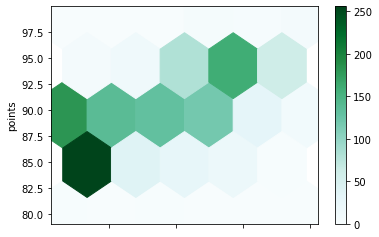

In [25]:
df[df['price'] < 80].plot.hexbin(x='price', y='points', gridsize=5)

    Tomando en cuenta cuando saqué el promedio de los precios y las calificaciones que tenian los vinos en las provincias, se puede notar que si se toma uno y otro como coordenadas coinciden en el punto donde hay más similitudes,tomando así un hexágono más oscuro que los demás. Aquí también se pueden ver los valores atípicos como en la gráfica anterior, haciendose ver un hexágono un poco más  oscuro que la mayoría entre (95.0,200)

    Aqui generé un joinplot; me llamó la atención que pudiera mostrarnos los valores atipicos como en la gráfica hexagonal, pero que a la vez nos generara un histograma en cada axis de la gráfica, esto nos permitirá hacer un mejor análisis de los datos.

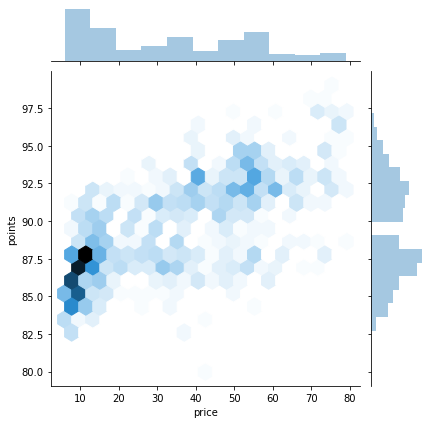

In [23]:
sns.jointplot(x='price', y='points', data=df[df['price'] < 80], kind='hex', 
              gridsize=20)

    Esto podría mostrarnos mediante las dos gráficas, la relación que se tiene, por así decirlo de cada par de datos (precio y popularidad)